In [4]:
#importing basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [5]:
#importing csv
train = pd.read_csv('train-chennai-sale.csv')

In [6]:
#checking top rows
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
#checking datatypes
train.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
#checking null values
train.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
#filling null values in N_BEDROOM field with the average of values in the same column, same with INT_SQFT, N_BATHROOM, QS_OVERALL
train = train.fillna({"N_BEDROOM": train["N_BEDROOM"].mean(), "INT_SQFT": train["INT_SQFT"].mean(),
                     "N_BATHROOM": train["N_BATHROOM"].mean(), "QS_OVERALL": train["QS_OVERALL"].mean()})

In [10]:
#changing the column type of columns 
train['N_BEDROOM'] = train['N_BEDROOM'].astype(int)
train['N_BATHROOM'] = train['N_BATHROOM'].astype(int)

In [11]:
#changing DATE_SALE and DATE_BUILD column type to date-time, so we can later use them 
train['DATE_SALE'] = pd.to_datetime(train['DATE_SALE'].astype(str), format='%d-%m-%Y')
train['DATE_BUILD'] = pd.to_datetime(train['DATE_BUILD'].astype(str), format='%d-%m-%Y')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


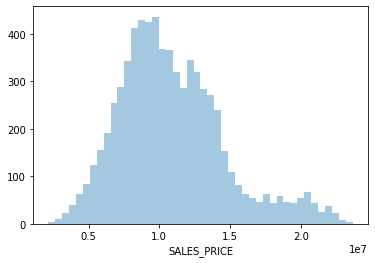

In [12]:
#checking the distribution of values in the target column
sns.distplot(train['SALES_PRICE'] , kde=False);

In [13]:
#Data wrangling, replacing incorrect values with correct values for better analysis 
train.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [14]:
train["AREA"].replace({"Chrompt": "Chrompet", "Chormpet": "Chrompet","Chrmpet":"Chrompet","Karapakam":"Karapakkam","TNagar":"T Nagar","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Velchery":"Velachery","KKNagar":"KK Nagar","Adyr":"Adyar"}, inplace=True)

In [15]:
train.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [16]:
train.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [17]:
train["SALE_COND"].replace({"Adj Land": "AdjLand", "Partiall": "Partial","PartiaLl":"Partial","Ab Normal":"AbNormal"}, inplace=True)

In [18]:
train.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [19]:
train.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [20]:
park = {'Noo':'No'}

In [21]:
train.PARK_FACIL = train.PARK_FACIL.replace(park)

In [22]:
train.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [23]:
train.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [24]:
train["BUILDTYPE"].replace({"Comercial": "Commercial", "Other": "Others"}, inplace=True)
train.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [25]:
train.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [26]:
train["UTILITY_AVAIL"].replace({"All Pub": "AllPub"}, inplace=True)
train.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [27]:
train.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [28]:
train.STREET = train.STREET.replace({'NoAccess':'No Access','Pavd':'Paved'})
train.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [29]:
#correlating all columns 
corrmat = train.corr()
print(corrmat)

               INT_SQFT  DIST_MAINROAD  ...    COMMIS  SALES_PRICE
INT_SQFT       1.000000       0.002022  ...  0.571076     0.612125
DIST_MAINROAD  0.002022       1.000000  ...  0.010994     0.018783
N_BEDROOM      0.786263      -0.002723  ...  0.430446     0.330987
N_BATHROOM     0.515290       0.001850  ...  0.256726     0.108834
N_ROOM         0.951279       0.002301  ...  0.533343     0.602760
QS_ROOMS       0.019850       0.002237  ...  0.009377     0.021967
QS_BATHROOM   -0.008337      -0.029468  ... -0.000471    -0.011377
QS_BEDROOM     0.008865       0.001554  ...  0.020118     0.018804
QS_OVERALL     0.013989      -0.017255  ...  0.016946     0.020485
REG_FEE        0.657544       0.011600  ...  0.659903     0.878148
COMMIS         0.571076       0.010994  ...  1.000000     0.626275
SALES_PRICE    0.612125       0.018783  ...  0.626275     1.000000

[12 rows x 12 columns]


In [30]:
#checking distribution across the table in relation to every other columns 
sns.pairplot(train, hue=None)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
#importing label encoder to format the data, so they can fit into the regression models without any error
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["AREA"] = le.fit_transform(train["AREA"])

train["SALE_COND"] = le.fit_transform(train["SALE_COND"])

train["PARK_FACIL"] = le.fit_transform(train["PARK_FACIL"])

train["BUILDTYPE"] = le.fit_transform(train["BUILDTYPE"])

train["UTILITY_AVAIL"] = le.fit_transform(train["UTILITY_AVAIL"])

train["STREET"] = le.fit_transform(train["STREET"])

train["MZZONE"] = le.fit_transform(train["MZZONE"])


In [32]:
#calculating the house lifetime using existing columns and adding it as a new column
train['HOUSE_LIFETIME'] = train['DATE_SALE'].subtract( train['DATE_BUILD'])
train['HOUSE_LIFETIME'] = train['HOUSE_LIFETIME'].divide( np.timedelta64(1, 'D'))

In [33]:
#defining target variable
y = train['SALES_PRICE']

In [34]:
#dropping the dependent variable from data frame 
train.drop(labels = 'SALES_PRICE',inplace=True, axis=1)

In [35]:
#dropping nominal and other variables that are useless for analysis
train.drop(labels = 'PRT_ID',inplace=True, axis=1)

In [36]:
train.drop(labels = 'DATE_SALE',inplace=True, axis=1)

In [37]:
train.drop(labels = 'DATE_BUILD',inplace=True, axis=1)

In [38]:
#checking datatypes of all columns at this point in time before applying regression model  
train.dtypes

AREA                int64
INT_SQFT            int64
DIST_MAINROAD       int64
N_BEDROOM           int64
N_BATHROOM          int64
N_ROOM              int64
SALE_COND           int64
PARK_FACIL          int64
BUILDTYPE           int64
UTILITY_AVAIL       int64
STREET              int64
MZZONE              int64
QS_ROOMS          float64
QS_BATHROOM       float64
QS_BEDROOM        float64
QS_OVERALL        float64
REG_FEE             int64
COMMIS              int64
HOUSE_LIFETIME    float64
dtype: object

In [39]:
#splitting dataframe into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [40]:
#importing linear regression library
from sklearn.linear_model import LinearRegression

In [41]:
#creating instance of linear regression method  
linearmodel = LinearRegression()

In [42]:
#fitting training dataset independent an dependent datasets into the linear model
linearmodel.fit(X_train,y_train)

LinearRegression()

In [43]:
#printing r2 score
print(linearmodel.score(X_test, y_test))


0.8775975792743748


In [44]:
#checking the co-efficient ie significance of each independant variable 
importance = linearmodel.coef_

In [45]:
col = train.columns

In [46]:
#printing all features and their significance in this model 
for i,v in enumerate(importance):
	print('Feature: %0d - %s, Score: %.5f' % (i,col[i],v))

Feature: 0 - AREA, Score: -171333.12558
Feature: 1 - INT_SQFT, Score: 992.34849
Feature: 2 - DIST_MAINROAD, Score: 387.48424
Feature: 3 - N_BEDROOM, Score: -1282534.70251
Feature: 4 - N_BATHROOM, Score: -1011703.89134
Feature: 5 - N_ROOM, Score: 1596231.20707
Feature: 6 - SALE_COND, Score: -53984.97768
Feature: 7 - PARK_FACIL, Score: 474468.13258
Feature: 8 - BUILDTYPE, Score: -1014504.66212
Feature: 9 - UTILITY_AVAIL, Score: -62916.86217
Feature: 10 - STREET, Score: -126363.37920
Feature: 11 - MZZONE, Score: 395373.43046
Feature: 12 - QS_ROOMS, Score: -33032.43946
Feature: 13 - QS_BATHROOM, Score: -88373.36151
Feature: 14 - QS_BEDROOM, Score: -55495.93331
Feature: 15 - QS_OVERALL, Score: 248338.29823
Feature: 16 - REG_FEE, Score: 13.11551
Feature: 17 - COMMIS, Score: 2.63943
Feature: 18 - HOUSE_LIFETIME, Score: -18.10906


In [47]:
#predicting dependent variables based on test dataset
pred = linearmodel.predict(X_test)

In [48]:
#checking the first 10 predicted values
pred[:10]

array([13713876.43088749,  9800565.75284403, 18296275.66407404,
        6736221.72487756, 13134625.55325766, 10110708.07324472,
        5113323.42555889, 13236959.92044388, 14409664.20307509,
       18698364.21765424])

In [49]:
#printing all the common metrics of the regression model used
print("r2 score",metrics.r2_score(y_test,pred))
print("MAE score",metrics.mean_absolute_error(y_test,pred))
print("MSE score",metrics.mean_squared_error(y_test,pred))
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2 score 0.8775975792743748
MAE score 1025745.7212439392
MSE score 1658730392595.2534
RMSE score 1287917.0752013708


using dummy variables for all categorical variables

In [50]:
#last time categorical variables were directly used, this time we can check if using dummy variables for category type features can give a better r2 score
train = pd.get_dummies(train,drop_first=True)
train.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,HOUSE_LIFETIME
0,4,1004,131,1,1,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,380000,144400,16060.0
1,1,1986,26,2,1,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,760122,304049,4015.0
2,0,909,70,1,1,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,421094,92114,7300.0
3,6,1855,14,3,2,5,2,0,2,3,2,2,4.7,3.9,3.6,4.010,356321,77042,8030.0
4,4,1226,84,1,1,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,237000,74063,10950.0


In [51]:
#train-test splitting
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [52]:
#creating a new instance 
model = LinearRegression()

In [53]:
#fitting training datasets
model.fit(X_train,y_train)

LinearRegression()

In [54]:
#printing model's score
print(model.score(X_test, y_test))


0.8775975792743748


In [55]:
#predicting values based on test dataset
pred = model.predict(X_test)

In [56]:
#printing first 10 predicted values
pred[:10]

array([13713876.43088749,  9800565.75284403, 18296275.66407404,
        6736221.72487756, 13134625.55325766, 10110708.07324472,
        5113323.42555889, 13236959.92044388, 14409664.20307509,
       18698364.21765424])

no change after using dummy variables in r2 score or predicted values

In [57]:
#since the last used model - linear regression gave us a score of .87, and absolute error of 100k, we can try a different regression model
#trying xg boost regression 
#importing all required packages
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [58]:
#splitting data into train and test 
X_train,X_valid,y_train,y_valid = train_test_split(train,y,random_state=0,test_size=0.2)

In [59]:
#defining xg boost regression model 
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [60]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [61]:
scores = cross_val_score(model, train, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [62]:
#printing absolute error 
scores = np.absolute(scores)


In [63]:
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 249192.410 (7777.142)


MAE significantly lesser than in linear regression

In [64]:
#trying to fit the training dataset into the xg boost regression model 
model.fit(X_train,y_train)

[16:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1000,
             subsample=0.7)

In [65]:
#predicting values based out of test dataset
yhat = model.predict(X_test)

In [66]:
#checking first 10 predicted values 
yhat[:10]

array([12946594. ,  7523497.5, 16434866. ,  6705983. , 15832014. ,
        9316072. ,  7577265. , 13235692. , 14772204. , 18137062. ],
      dtype=float32)

In [67]:
model.score(X_test, y_test) 


0.9983656850680198

In [68]:
yhat =  model.predict(X_test)

In [69]:
#checking r2 score
metrics.r2_score(yhat, y_test) 

0.9983608976823818

score in xg booster regression is 0.99 which is better than in linear regression where score is 0.877